In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import matplotlib.cm as cm
from helpers_plot import initPlot, finalizePlot
# from ipywidgets import interact, widgets
# %matplotlib widget

initPlot()

In [10]:
dir="/home/laila/OneDrive/1_Work/5_Projects/02_3ptStatistics/Map3_Covariances/SLICS_theta_4_to_16/"

Map2=np.load(dir+"/map_squared.npy")

Cov_MS=np.cov(Map2)

Cov_gauss=np.loadtxt(dir+"covMap2_infinite_Gauss_sigma_0.37_n_107987.71_thetaMax_7.87_gpu.dat")*6
Cov_nongauss=np.loadtxt(dir+"covMap2_infinite_NonGauss_sigma_0.37_n_107987.71_thetaMax_7.87_gpu.dat")



# Set Thetas labels
thetas_ind = np.array([4,8,16])
thetas_labels = []
for thetas in thetas_ind:
    thetas_labels.append(f"{thetas}'")
N = len(thetas_ind)
thetas_ticks = np.arange(0, N)

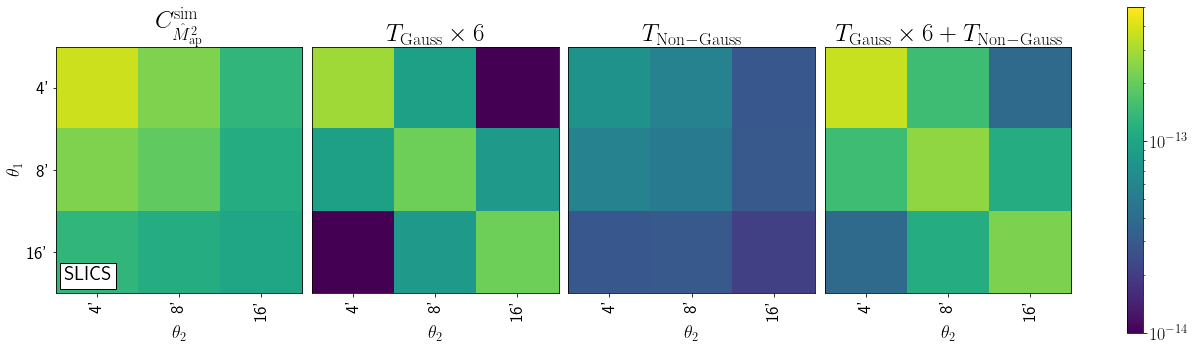

In [11]:
fig, ax=plt.subplots(ncols=4, figsize=(20,6))
plt.subplots_adjust(hspace=0, wspace=0.04)


vmin=1e-14
vmax=5e-13

ax[0].set_title(r"$C^{\mathrm{sim}}_{\hat{M}_\mathrm{ap}^2}$", size=25)
ax[0].set_ylabel(r'$\theta_1$')
ax[0].set_yticks(thetas_ticks)
ax[0].set_yticklabels(thetas_labels)
ax[0].set_xlabel(r'$\theta_2$')
ax[0].set_xticks(thetas_ticks)
ax[0].set_xticklabels(thetas_labels, rotation=90)

ax[1].set_title(r"$T_\mathrm{Gauss} \times 6$", size=25)
ax[1].set_xlabel(r'$\theta_2$')
ax[1].set_xticks(thetas_ticks)
ax[1].set_xticklabels(thetas_labels, rotation=90)
ax[1].set_yticks([])

ax[2].set_title(r"$T_\mathrm{Non-Gauss}$", size=25)

ax[2].set_xlabel(r'$\theta_2$')
ax[2].set_xticks(thetas_ticks)
ax[2].set_xticklabels(thetas_labels, rotation=90)
ax[2].set_yticks([])

ax[3].set_title(r"$T_\mathrm{Gauss} \times 6+T_\mathrm{Non-Gauss}$", size=25)

ax[3].set_xlabel(r'$\theta_2$')
ax[3].set_xticks(thetas_ticks)
ax[3].set_xticklabels(thetas_labels, rotation=90)
ax[3].set_yticks([])

im=ax[0].imshow(Cov_MS, norm=LogNorm(vmin=vmin, vmax=vmax))

im=ax[1].imshow(Cov_gauss, norm=LogNorm(vmin=vmin, vmax=vmax))


im=ax[2].imshow(Cov_nongauss, norm=LogNorm(vmin=vmin, vmax=vmax))

im=ax[3].imshow(Cov_nongauss+Cov_gauss, norm=LogNorm(vmin=vmin, vmax=vmax))
fig.colorbar(im, ax=ax.ravel(), fraction=0.04)

ax[0].text(-0.4,N-0.6, r"SLICS", bbox=dict(facecolor='white'), horizontalalignment='left', verticalalignment='bottom', size=20)

finalizePlot(ax, outputFn=dir+"/SLICS_Map2CovSqrt2.png", showlegend=False, tightlayout=False)

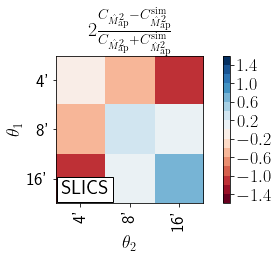

In [12]:
cmap2=cm.get_cmap('RdBu', 16)
vmin=-1.6
vmax=1.6

fracDiff=-2*(Cov_MS-Cov_gauss-Cov_nongauss)/(Cov_MS+Cov_gauss+Cov_nongauss)

fig, ax=plt.subplots()
ax.set_title(r"$2\frac{C_{\hat{M}_\mathrm{ap}^2}-C^{\mathrm{sim}}_{\hat{M}_\mathrm{ap}^2}}{C_{\hat{M}_\mathrm{ap}^2}+C^{\mathrm{sim}}_{\hat{M}_\mathrm{ap}^2}}$", size=20)

ax.set_ylabel(r'$\theta_1$')
ax.set_yticks(thetas_ticks)
ax.set_yticklabels(thetas_labels)
ax.set_xlabel(r'$\theta_2$')
ax.set_xticks(thetas_ticks)
ax.set_xticklabels(thetas_labels, rotation=90)

im=ax.imshow(fracDiff, vmin=vmin, vmax=vmax,  cmap=cmap2)
fig.colorbar(im, ax=ax, ticks=[-1.4, -1, -0.6, -0.2,0.2, 0.6, 1, 1.4])

ax.text(-0.4,N-0.6, r"SLICS", bbox=dict(facecolor='white'), horizontalalignment='left', verticalalignment='bottom', size=20)


finalizePlot(ax, outputFn=dir+"/SLICS_Map2CovSqrt2_fracErr.png", showlegend=False)


In [13]:
dir="/home/laila/OneDrive/1_Work/5_Projects/02_3ptStatistics/Map3_Covariances/MS/"

Map2=np.load(dir+"/map_squared_ngal_0_shapenoise_0.npy")

Cov_MS=np.cov(Map2)[-3:, -3:]
print(Cov_MS.shape)

Cov_gauss=np.loadtxt(dir+"covMap2_infinite_Gauss_sigma_0.00_n_1048456.68_thetaMax_1.87_gpu.dat")
Cov_nongauss=np.loadtxt(dir+"covMap2_infinite_NonGauss_sigma_0.00_n_1048456.68_thetaMax_1.87_gpu.dat")



# Set Thetas labels
thetas_ind = np.array([4,8,16])
thetas_labels = []
for thetas in thetas_ind:
    thetas_labels.append(f"{thetas}'")
N = len(thetas_ind)
thetas_ticks = np.arange(0, N)

(3, 3)


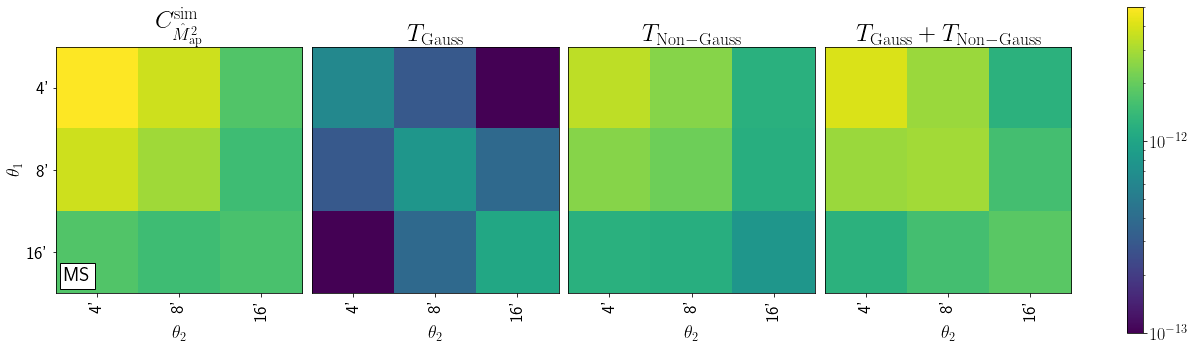

In [14]:
fig, ax=plt.subplots(ncols=4, figsize=(20,6))
plt.subplots_adjust(hspace=0, wspace=0.04)


vmin=1e-13
vmax=5e-12

ax[0].set_title(r"$C^{\mathrm{sim}}_{\hat{M}_\mathrm{ap}^2}$", size=25)
ax[0].set_ylabel(r'$\theta_1$')
ax[0].set_yticks(thetas_ticks)
ax[0].set_yticklabels(thetas_labels)
ax[0].set_xlabel(r'$\theta_2$')
ax[0].set_xticks(thetas_ticks)
ax[0].set_xticklabels(thetas_labels, rotation=90)

ax[1].set_title(r"$T_\mathrm{Gauss}$", size=25)
ax[1].set_xlabel(r'$\theta_2$')
ax[1].set_xticks(thetas_ticks)
ax[1].set_xticklabels(thetas_labels, rotation=90)
ax[1].set_yticks([])

ax[2].set_title(r"$T_\mathrm{Non-Gauss}$", size=25)

ax[2].set_xlabel(r'$\theta_2$')
ax[2].set_xticks(thetas_ticks)
ax[2].set_xticklabels(thetas_labels, rotation=90)
ax[2].set_yticks([])

ax[3].set_title(r"$T_\mathrm{Gauss}+T_\mathrm{Non-Gauss}$", size=25)

ax[3].set_xlabel(r'$\theta_2$')
ax[3].set_xticks(thetas_ticks)
ax[3].set_xticklabels(thetas_labels, rotation=90)
ax[3].set_yticks([])

im=ax[0].imshow(Cov_MS, norm=LogNorm(vmin=vmin, vmax=vmax))

im=ax[1].imshow(Cov_gauss, norm=LogNorm(vmin=vmin, vmax=vmax))


im=ax[2].imshow(Cov_nongauss, norm=LogNorm(vmin=vmin, vmax=vmax))

im=ax[3].imshow(Cov_nongauss+Cov_gauss, norm=LogNorm(vmin=vmin, vmax=vmax))
fig.colorbar(im, ax=ax.ravel(), fraction=0.04)

ax[0].text(-0.4,N-0.6, r"MS", bbox=dict(facecolor='white'), horizontalalignment='left', verticalalignment='bottom', size=20)

finalizePlot(ax, outputFn=dir+"/MS_Map2Cov.png", showlegend=False, tightlayout=False)

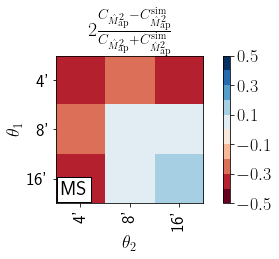

In [15]:
cmap2=cm.get_cmap('RdBu', 10)
vmin=-0.5
vmax=0.5



fracDiff=-2*(Cov_MS-Cov_gauss-Cov_nongauss)/(Cov_MS+Cov_gauss+Cov_nongauss)

fig, ax=plt.subplots()
ax.set_title(r"$2\frac{C_{\hat{M}_\mathrm{ap}^2}-C^{\mathrm{sim}}_{\hat{M}_\mathrm{ap}^2}}{C_{\hat{M}_\mathrm{ap}^2}+C^{\mathrm{sim}}_{\hat{M}_\mathrm{ap}^2}}$", size=20)

ax.set_ylabel(r'$\theta_1$')
ax.set_yticks(thetas_ticks)
ax.set_yticklabels(thetas_labels)
ax.set_xlabel(r'$\theta_2$')
ax.set_xticks(thetas_ticks)
ax.set_xticklabels(thetas_labels, rotation=90)

im=ax.imshow(fracDiff, vmin=vmin, vmax=vmax,  cmap=cmap2)
fig.colorbar(im, ax=ax, ticks=[-1.4, -0.5, -0.3, -0.1,0.1, 0.3, 0.5, 1.4])

ax.text(-0.4,N-0.6, r"MS", bbox=dict(facecolor='white'), horizontalalignment='left', verticalalignment='bottom', size=20)


finalizePlot(ax, outputFn=dir+"/MS_Map2Cov_fracErr.png", showlegend=False)
